# PSET1 - Object Oriented Programming

This problem set has only one part. You will be graded based on:

- Correct completion of the task.
- Your code is readable.
- Your names are logical and clear.

Hint: Build this problem set piece by piece.

## Problem description:

You work on a team of data scientists that regularly perform analysis and create many charts. Your boss has asked you to create a reusable piece of code that can perform most of this plotting without having to retype a lot of code. 

There are several functions you should make to perform this plotting, and you should encapuslate it all in a class called **Plot** that **takes your dataframe as input**. Here are the plotting functions it should have:

- **Box plots of all numeric features** - This function should find all the numeric features in your dataframe and construct a faceted plot (a grid or subplots). Each subplotplot should have the feature labeled and the larger plot should have a title.

- **Single scatter plot of two columns** - This function should take 2 column names and build a scatter plot for them. The axes labels and title should be auto generated.

- **Scatter matrix with extras** - This function should plot a scatter matrix with histograms plotted along the diagonal. In addition to the scatter matrix, the function should tell which columns were not able to be included in the scatter matrix. 


Note: You can use Matplotlib, Plotly, or Seaborn for this PSET. Also, each function should include **at least a basic docstring**.

## Demostrate completion:

In order to complete the PSET you will need to create your Class and then **demonstrate its usage**. Once you have created your class and functions, you should demonstrate their usage on the Titanic dataset in this repository's data directory.

Good luck!

In [1]:
# Your code here
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
class Plot:
    def __init__(self, df):
        self.df = df
    
    def boxplot_num(self):
        numeric = self.df.select_dtypes(include=['float64', 'int64']).columns
        
        num_cols = len(numeric)
        if num_cols == 0:
            print("There is no numeric columns")
            return
        
        fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, 
                                 ncols=3, 
                                 figsize=(15, 5 * ((num_cols + 2) // 3)))
        fig.suptitle('Box plots of all numeric features')
        
        for i, col in enumerate(numeric):
            ax = axes[i // 3, i % 3]
            sns.boxplot(data=self.df, y=col, ax=ax)
            ax.set_title(col)

        plt.show()
    
    def scatter_plot(self, col1, col2):
        if col1 not in self.df.columns or col2 not in self.df.columns:
            print(f"One or both columns {col1}, {col2} do not exist in the dataframe.")
            return
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=self.df, x=col1, y=col2)
        plt.title(f'{col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

    def scatter_matrix(self):
        numeric = self.df.select_dtypes(include=['float64', 'int64']).columns
        
        if len(numeric) < 2:
            print("There is not enough numeric columns")
            return
        
        scatter_matrix(self.df[numeric], figsize=(12, 12), diagonal='hist')
        plt.suptitle('Scatter Matrix')
        plt.show()

### Importing Data

In [3]:
df = pd.read_csv('data/titanic.csv')

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
plotter = Plot(df)

### Box plot

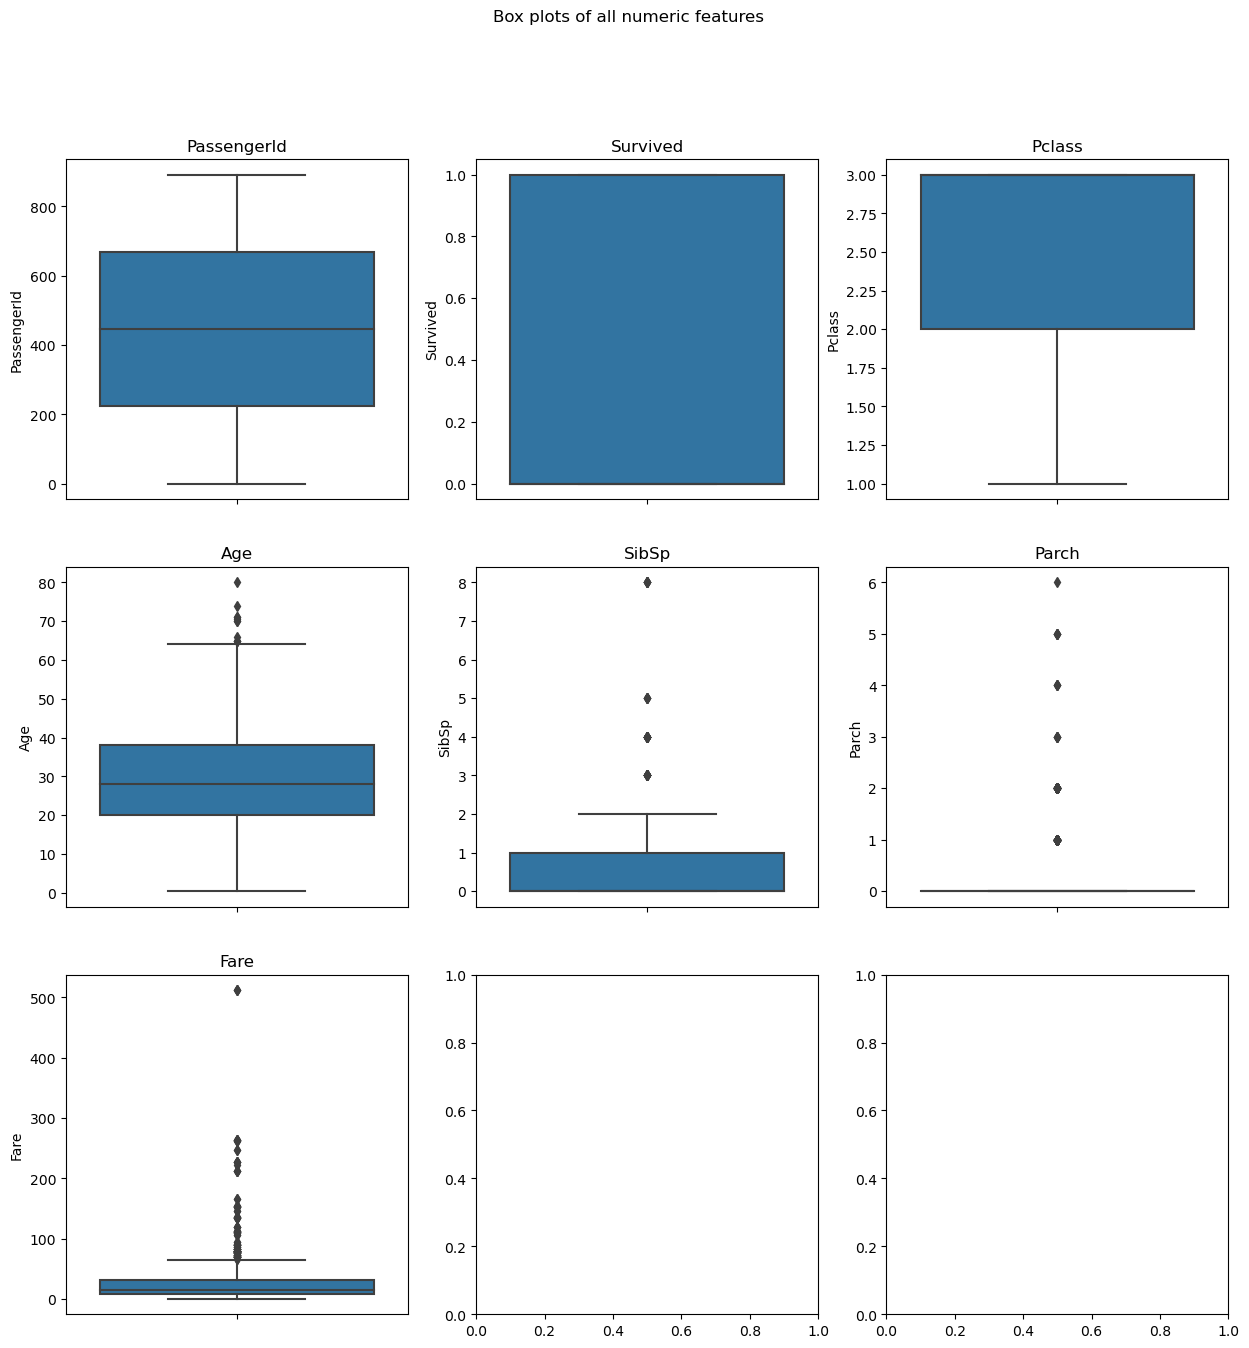

In [78]:
# Box plot
plotter.boxplot_num()

### Scatter plot

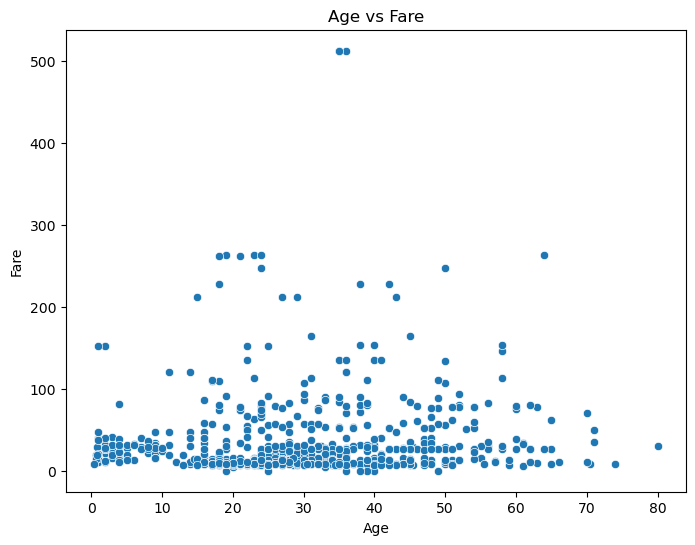

In [79]:
# Scatter plot between two columns
plotter.scatter_plot('Age', 'Fare')

### Scatter Matrix

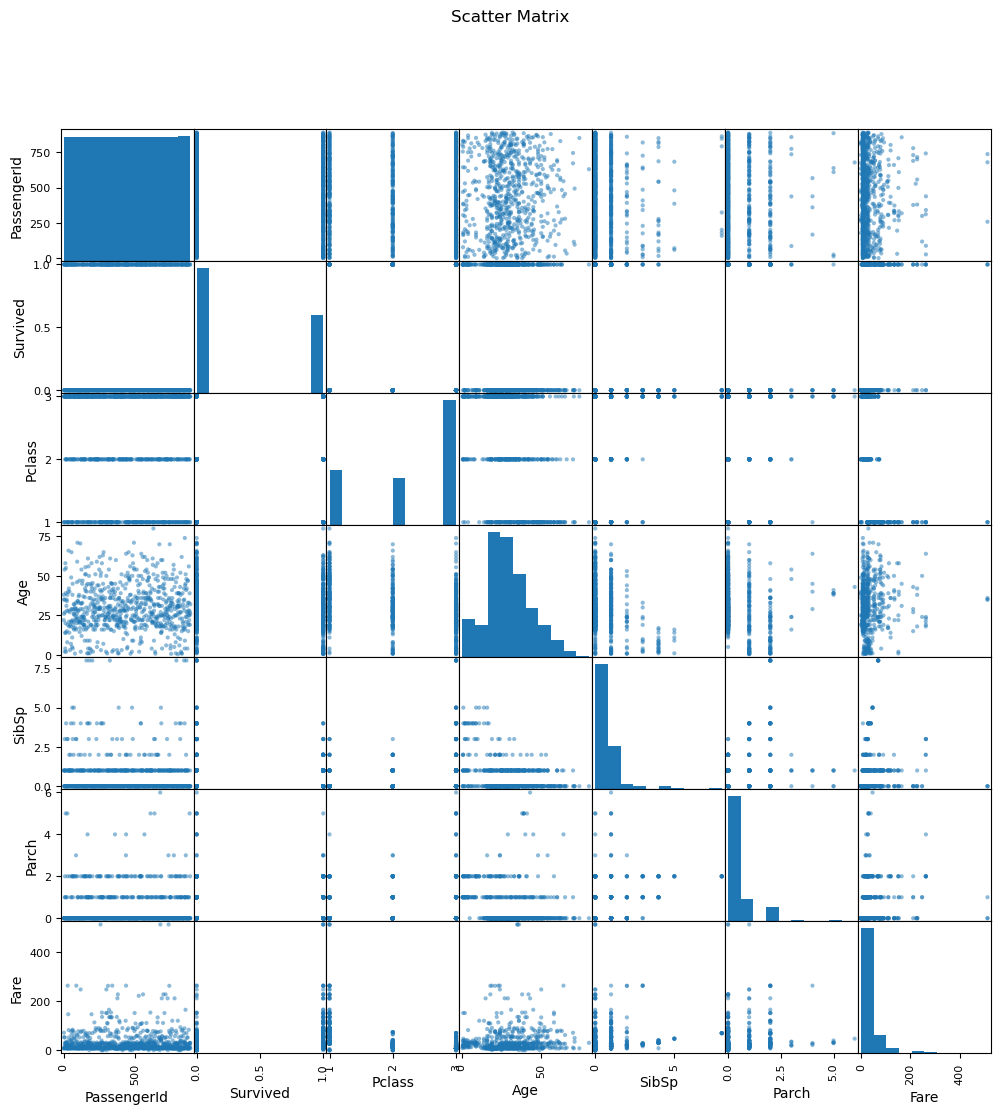

In [80]:
# Scatter matrix with extras
plotter.scatter_matrix()